# Stock Analysis

### Author : 钟智强

#### Objectives
The main objectives of this analysis are:
1. **Data Collection**: Gather historical stock price data for Stocks from a reliable financial data source.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough exploratory data analysis to understand the trends, patterns, and anomalies in  stock prices.
3. **Technical Analysis**: Apply various technical indicators and charting techniques to identify potential trading signals and trends.
4. **Statistical Analysis**: Perform statistical tests and analyses to assess the stock's performance and volatility.
5. **Predictive Modeling**: Develop predictive models to forecast future stock prices based on historical data.
6. **Sentiment Analysis**: Analyze market sentiment related to Stocks by incorporating news and social media data.



1. Get Stocks Information and Price

> Import dependencies

In [96]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

nvidia = yf.Ticker("NVDA")
intel = yf.Ticker("INTC")
meta = yf.Ticker("META")
tme = yf.Ticker("TME")

nvidia_stock_data = nvidia.history(period="1d")
intel_stock_data = intel.history(period="1d")
meta_stock_data = meta.history(period="1d")
tme_stock_data = tme.history(period="1d")

2. Display latest Stock table

In [97]:
current_price = nvidia_stock_data["Close"][0]
open_price = nvidia_stock_data["Open"][0]
high_price = nvidia_stock_data["High"][0]
low_price = nvidia_stock_data["Low"][0]
volume = nvidia_stock_data["Volume"][0]

i_current_price = intel_stock_data["Close"][0]
i_open_price = intel_stock_data["Open"][0]
i_high_price = intel_stock_data["High"][0]
i_low_price = intel_stock_data["Low"][0]
i_volume = intel_stock_data["Volume"][0]

m_current_price = meta_stock_data["Close"][0]
m_open_price = meta_stock_data["Open"][0]
m_high_price = meta_stock_data["High"][0]
m_low_price = meta_stock_data["Low"][0]
m_volume = meta_stock_data["Volume"][0]

t_current_price = tme_stock_data["Close"][0]
t_open_price = tme_stock_data["Open"][0]
t_high_price = tme_stock_data["High"][0]
t_low_price = tme_stock_data["Low"][0]
t_volume = tme_stock_data["Volume"][0]

# Combine data into a single DataFrame
combined_stock_data = {
    "Datetime": current_datetime,
    "Stock Ticker": ["NVDA", "INTC", "META", "TME"],
    "Open Price": [
        f"${open_price:.2f}",
        f"${i_open_price:.2f}",
        f"${m_open_price:.2f}",
        f"${t_open_price:.2f}",
    ],
    "High Price": [
        f"${high_price:.2f}",
        f"${i_high_price:.2f}",
        f"${m_high_price:.2f}",
        f"${t_high_price:.2f}",
    ],
    "Low Price": [
        f"${low_price:.2f}",
        f"${i_low_price:.2f}",
        f"${m_low_price:.2f}",
        f"${t_low_price:.2f}",
    ],
    "Current Price": [
        f"${current_price:.2f}",
        f"${i_current_price:.2f}",
        f"${m_current_price:.2f}",
        f"${t_current_price:.2f}",
    ],
    "Volume": [volume, i_volume, m_volume, t_volume],
}

# Create a DataFrame
df = pd.DataFrame(combined_stock_data)

# Display the DataFrame
display(df)

,Datetime,Stock Ticker,Open Price,High Price,Low Price,Current Price,Volume
0,2024-07-28 16:09:12,NVDA,$116.19,$116.20,$111.58,$113.06,292831600
1,2024-07-28 16:09:12,INTC,$31.43,$31.56,$31.02,$31.35,38316600
2,2024-07-28 16:09:12,META,$464.20,$469.77,$459.42,$465.70,14209300
3,2024-07-28 16:09:12,TME,$14.40,$14.45,$13.82,$14.09,6582700


3. Download Datasets

In [98]:
ticker = "NVDA" # Change this Accordingly

download = False

stock_data = yf.download(ticker, start="2024-03-01", end="2024-07-28")

display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-01,80.000000,82.300003,79.434998,82.278999,82.268379,479135000
2024-03-04,84.129997,87.695000,83.719002,85.237000,85.225998,615616000
2024-03-05,85.269997,86.097000,83.417000,85.963997,85.956940,520639000
2024-03-06,88.022003,89.723999,87.029999,88.699997,88.692711,582520000
2024-03-07,90.157997,92.766998,89.601997,92.668999,92.661385,608119000
...,...,...,...,...,...,...
2024-07-22,120.349998,124.070000,119.860001,123.540001,123.540001,258068900
2024-07-23,122.779999,124.690002,122.099998,122.589996,122.589996,173911000
2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900


4. Process downloaded datasets

In [99]:
stock_data["Date"] = stock_data.index
stock_data["Day"] = stock_data["Date"].apply(lambda x: x.day)
stock_data["Month"] = stock_data["Date"].apply(lambda x: x.month)
stock_data["Year"] = stock_data["Date"].apply(lambda x: x.year)

features = stock_data[["Day", "Month", "Year"]]
target = stock_data["Close"]

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5, random_state=42
)

5. Train Model

### Linear Regression Model

Linear regression is utilized to model the relationship between independent variables (features) and the dependent variable (target, in this case, stock prices). The formula for a simple linear regression can be represented as:

$$
\hat{y} = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$
- **Variables**:
  - \(\hat{y}\): Predicted value (predicted stock price).
  - \(b_0, b_1, \ldots, b_n\): Coefficients determined during model training.
  - \(x_1, x_2, \ldots, x_n\): Input features (day, month, year).

### Mean Squared Error (MSE)

Mean Squared Error measures the average squared difference between predicted values and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Variables**:
  - \(y_i\): Actual values.
  - \(\hat{y}_i\): Predicted values.
  - \(n\): Number of samples.


In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

display(f"Mean Squared Error: {mse}")

'Mean Squared Error: 90.03039164385318'

6. Visualise the predicted Data.

Data visualization is achieved using Matplotlib to plot actual and predicted stock prices over time:

- **Matplotlib**: Python library for plotting.
- **Subplots**: `plt.subplots(2, 1)` creates two vertically stacked subplots.
- **Plotting**: `ax[0].plot()` and `ax[1].plot()` are used to plot actual and predicted prices, with various styling options (`color`, `alpha`, `linestyle`, `legend`, `grid`) applied for clarity.

### Data Collection and Preparation

- Historical stock price data is fetched using `yfinance` for stocks such as Nvidia (`NVDA`), Intel (`INTC`), Meta (`META`), and Tencent Music (`TME`).
- Data is processed (`DataFrame` manipulation) to extract features (`Day`, `Month`, `Year`) and the target variable (`Close` price).


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

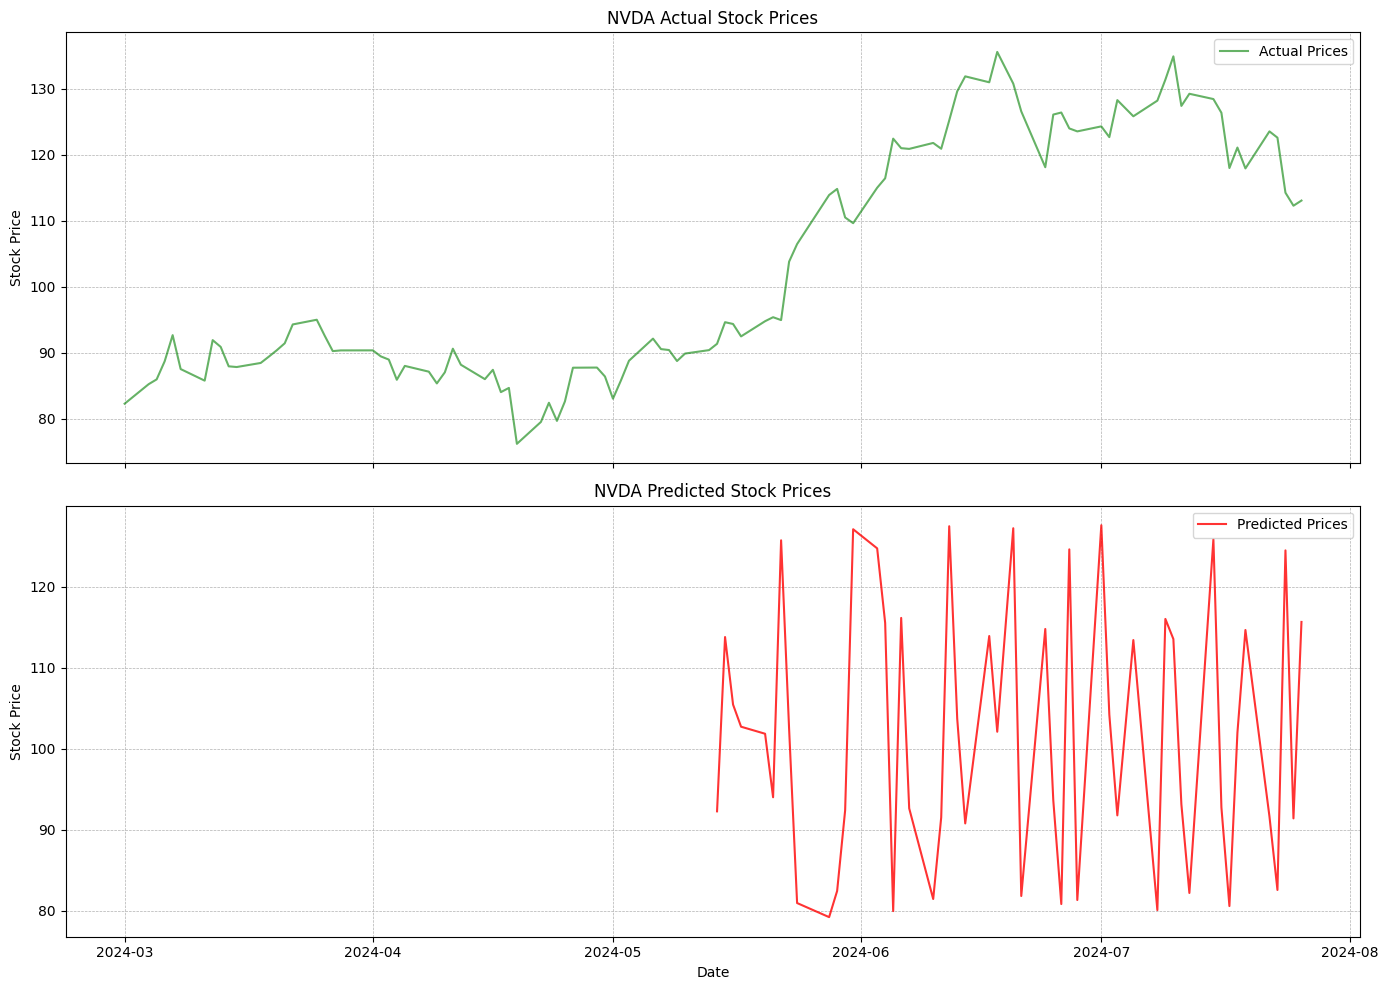

In [102]:
from matplotlib.dates import DateFormatter

# Create a new DataFrame to hold the dates and predictions
pred_df = pd.DataFrame(
    {
        "Date": stock_data["Date"][len(stock_data) - len(predictions) :],
        "Predicted": predictions,
    }
)

# Set up the subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot actual prices
ax[0].plot(
    stock_data["Date"],
    stock_data["Close"],
    label="Actual Prices",
    color="green",
    alpha=0.6,
)
ax[0].set_ylabel("Stock Price")
ax[0].set_title(f"{ticker} Actual Stock Prices")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)

ax[1].plot(
    pred_df["Date"],
    pred_df["Predicted"],
    label="Predicted Prices",
    color="red",
    linestyle="-",
    alpha=0.8,
)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Stock Price")
ax[1].set_title(f"{ticker} Predicted Stock Prices")
ax[1].legend()
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

display(plt)

Output Current Price of selected Stock to csv

In [103]:
if download: md_data = stock_data.to_csv(f"output/{ticker}_Price-{current_datetime}", index=False) 

Calculate Moving Averages

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

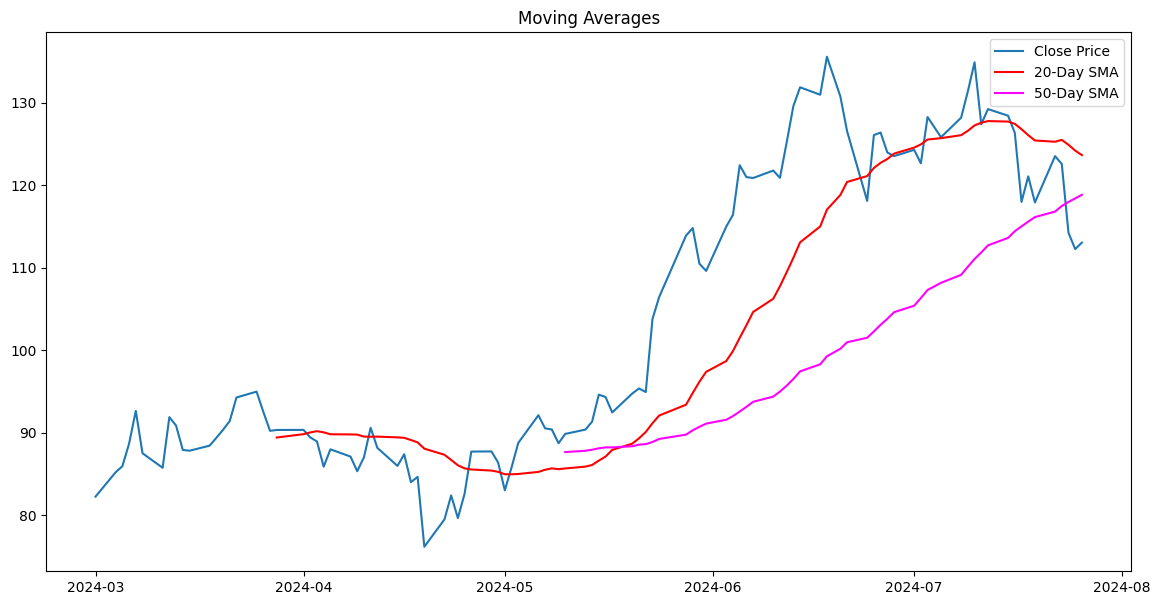

In [104]:
# Calculate Moving Averages
stock_data["20_SMA"] = stock_data["Close"].rolling(window=20).mean()
stock_data["50_SMA"] = stock_data["Close"].rolling(window=50).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["20_SMA"], label="20-Day SMA", color="red")
plt.plot(stock_data["50_SMA"], label="50-Day SMA", color="magenta")
plt.title("Moving Averages")
plt.legend()

display(plt)

7. Market Sentiment Analysis

Gather comprehensive news and updates about the stock market, conduct in-depth analysis, and provide detailed insights and forecasts.

In [105]:
def fetch_stock_news(ticker):
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey=c27ac3ff5baa4f36abd7d6d90110da55&language=zh"
    response = requests.get(url)

    if response.status_code == 200:
        news_data = response.json()
        if 'articles' in news_data:
            return news_data["articles"]
        else:
            print(f"No articles found for {ticker}. News data structure:\n{news_data}")
            return []
    else:
        print(f"Failed to fetch news for {ticker}. Status code: {response.status_code}")
        return []

def sentiment_text(value):
    match value:
        case value if value < 0:
            return "Negative"
        case value if value == 0:
            return "Neutral"
        case value if value > 0:
            return "Positive"


# Analyze sentiment
def analyze_sentiment(articles):
    sentiment_scores = []
    for article in articles:
        title = article.get("title", "") or ""
        description = article.get("description", "") or ""
        text = title + " " + description
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_scores.append(sentiment)
    return sentiment_scores


articles = fetch_stock_news(ticker)

if articles:
    sentiment_scores = analyze_sentiment(articles)
    average_sentiment = np.mean(sentiment_scores)
    sentiment_score_text = sentiment_text(average_sentiment)
    
    # Display sentiment summary
    print(f"{ticker}: Average Sentiment: {average_sentiment} | {sentiment_score_text}")
    
    # Prepare articles for display in a table
    article_data = []
    for article in articles:
        article_data.append(
            {
                "Article Title": article.get("title", "N/A"),
                "Article Description": article.get("description", "N/A"),
                "Article URL": article.get("url", "N/A"),
            }
        )
    
    # Create a DataFrame and display it
    df_articles = pd.DataFrame(article_data)
    top_10_articles = df_articles.head(10)
    
    display(top_10_articles)

    # Optional: Download and save to CS
    if download:
        # Save the top 10 articles to a CSV file
        top_10_articles.to_csv("output/top_10_articles.csv", index=False)

        # Read the CSV file back into a DataFrame
        read_df = pd.read_csv("output/top_10_articles.csv")
        display(read_df)

        # Convert DataFrame to Markdown format
        markdown_table = read_df.to_markdown(index=False)

        # Save the Markdown table to a .md file
        current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        file_name = f"output/Top_news_affected_{ticker}_{current_datetime}.md"

        with open(file_name, "w") as f:
            f.write(markdown_table)

    # Display the original DataFrame
    display(df_articles)
else:
    print(f"No articles found for {ticker}. Check your API key or ticker symbol.")

NVDA: Average Sentiment: 0.00684931506849315 | Positive


,Article Title,Article Description,Article URL
0,盤中速報 - 輝達(NVDA-US)大漲2.92%，報131.94美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
1,盤中速報 - 輝達(NVDA-US)大跌3.92%，報117.79美元,輝達(NVDA-US)盤中下跌，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
2,盤中速報 - 輝達(NVDA-US)大跌2.66%，報131.33美元,輝達(NVDA-US)盤中下跌，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
3,盤中速報 - 輝達(NVDA-US)大漲3.72%，報122.32美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
4,盤中速報 - 輝達(NVDA-US)大漲2.86%，報127.53美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
5,【量大強漲股整理】台股震盪整理下，多元題材最飆，生技、綠能誰最強?,加權指數，今日開高走低，終場下跌 37.57 點，收在 23879.36 點，成交量 460...,https://tw.stock.yahoo.com/news/%E9%87%8F%E5%A...
6,震蕩行情下，「它」卻逆勢上漲！,上週大盤收盤表現出乎意料，本應強勢收尾的市場卻出現下跌。大華國際證券分析師張志誠表示，台北股...,https://tw.stock.yahoo.com/news/%E9%9C%87%E8%9...
7,【量大強漲股整理】AI擴散效應持續發威下，該如何選股，掌握題材股?,加權指數，今日開高走高，終場上漲 382.95 點，收在 24390.03 點，再創歷史新高...,https://tw.stock.yahoo.com/news/%E9%87%8F%E5%A...
8,国会山股神再度出手 佩洛西再次买入英伟达，抛售特斯拉,7月4日消息，据外电报道，新的文件显示，美国前众议院院长南希·佩洛西和她的丈夫保罗上个月对他...,https://www.cnbeta.com.tw/articles/tech/143706...
9,輝達股東會明燈，電力股大漲後，下一個單飛大漲的股票會是誰？,"今日台股上漲了 126 點，但成交量僅達到 4,359 億元。大華國際投顧分析師張志誠指出，...",https://tw.stock.yahoo.com/news/%E8%BC%9D%E9%8...


,Article Title,Article Description,Article URL
0,盤中速報 - 輝達(NVDA-US)大漲2.92%，報131.94美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
1,盤中速報 - 輝達(NVDA-US)大跌3.92%，報117.79美元,輝達(NVDA-US)盤中下跌，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
2,盤中速報 - 輝達(NVDA-US)大跌2.66%，報131.33美元,輝達(NVDA-US)盤中下跌，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
3,盤中速報 - 輝達(NVDA-US)大漲3.72%，報122.32美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
4,盤中速報 - 輝達(NVDA-US)大漲2.86%，報127.53美元,輝達(NVDA-US)盤中上漲，漲跌幅、近日週月績效、相關指數表現、即時新聞資訊。,https://tw.stock.yahoo.com/news/%E7%9B%A4%E4%B...
...,...,...,...
68,〈美股早盤〉美5月PCE報喜 主要指數走高,美股主要指數周五 (28 日) 開盤走高，因美國最新關鍵通膨數據放緩，強化今年降息的希望。,https://tw.stock.yahoo.com/news/%E7%BE%8E%E8%8...
69,〈美股早盤〉市場靜待Fed會議紀錄出爐 主要指數平盤波動,美股主要指數周三 (3 日) 平盤波動，投資人評估一連串新出爐就業市場數據，同時靜待稍晚聯準...,https://tw.stock.yahoo.com/news/%E7%BE%8E%E8%8...
70,【量大強漲股整理】台股再創新高，櫃買開高走低，選股策略為何?,加權指數，今日開低走高，終場上漲 321.56 點，收在 23878.15 點，成交量 55...,https://tw.stock.yahoo.com/news/%E9%87%8F%E5%A...
71,【量大強漲股整理】台股震盪回檔下，選股策略為何，逆風而上的族群是?,加權指數，今日開低走低，終場下跌 473.1 點，收在 23916.93 點，成交量 578...,https://tw.stock.yahoo.com/news/%E9%87%8F%E5%A...


8. Simulate Trading Strategies

In [106]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data.set_index("Date", inplace=True)

# Calculate moving averages
def calculate_moving_average(data, window_size, column="Close"):
    return data[column].rolling(window=window_size).mean()


short_window = 50
long_window = 200

stock_data["Short_MA"] = calculate_moving_average(stock_data, short_window)
stock_data["Long_MA"] = calculate_moving_average(stock_data, long_window)


# Generate signals based on moving average crossover
def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals["Signal"] = 0.0

    # Generate buy signals: short-term crosses above long-term
    signals.loc[data["Short_MA"] > data["Long_MA"], "Signal"] = 1.0

    # Generate sell signals: short-term crosses below long-term
    signals.loc[data["Short_MA"] < data["Long_MA"], "Signal"] = -1.0

    # Calculate positions (holding -1 for sell, 1 for buy)
    signals["Position"] = signals["Signal"].diff()

    return signals


signals = generate_signals(stock_data)


# Backtest strategy
def backtest_strategy(data, signals, initial_capital=100000):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions["Stock"] = 100 * signals["Signal"]  # Assuming buying 100 shares per trade

    portfolio = positions.multiply(data["Close"], axis=0)
    pos_diff = positions.diff()

    portfolio["Holdings"] = (positions.multiply(data["Close"], axis=0)).sum(axis=1)
    portfolio["Cash"] = (
        initial_capital
        - (pos_diff.multiply(data["Close"], axis=0)).sum(axis=1).cumsum()
    )

    portfolio["Total"] = portfolio["Holdings"] + portfolio["Cash"]
    portfolio["Returns"] = portfolio["Total"].pct_change()

    return portfolio


backtest_results = backtest_strategy(stock_data, signals)

Evaluate and Visualize Results

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

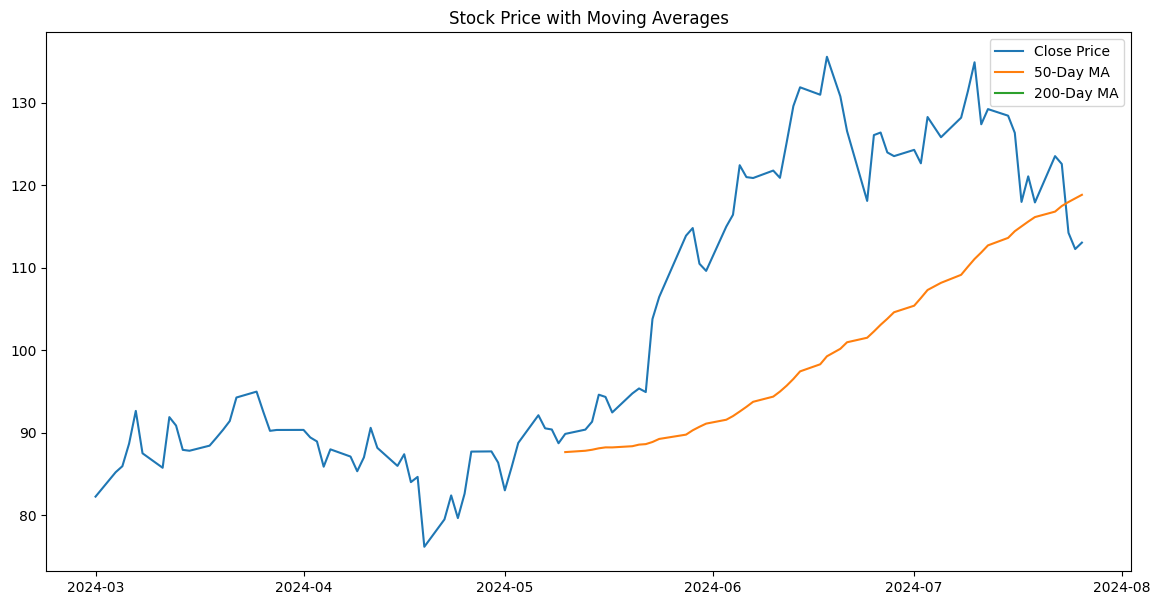

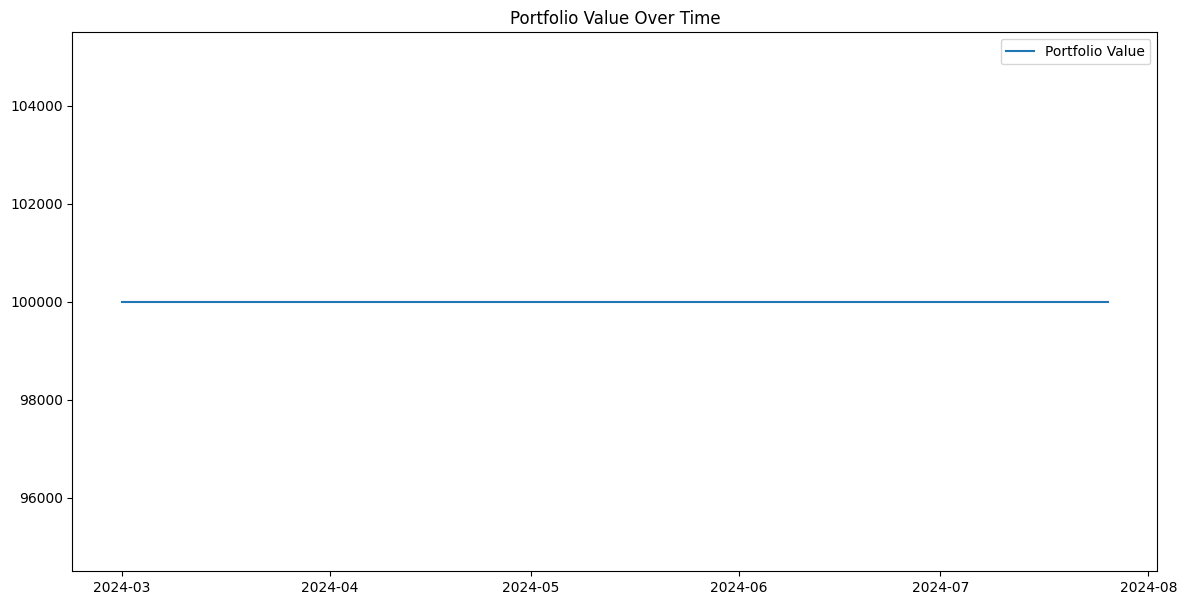

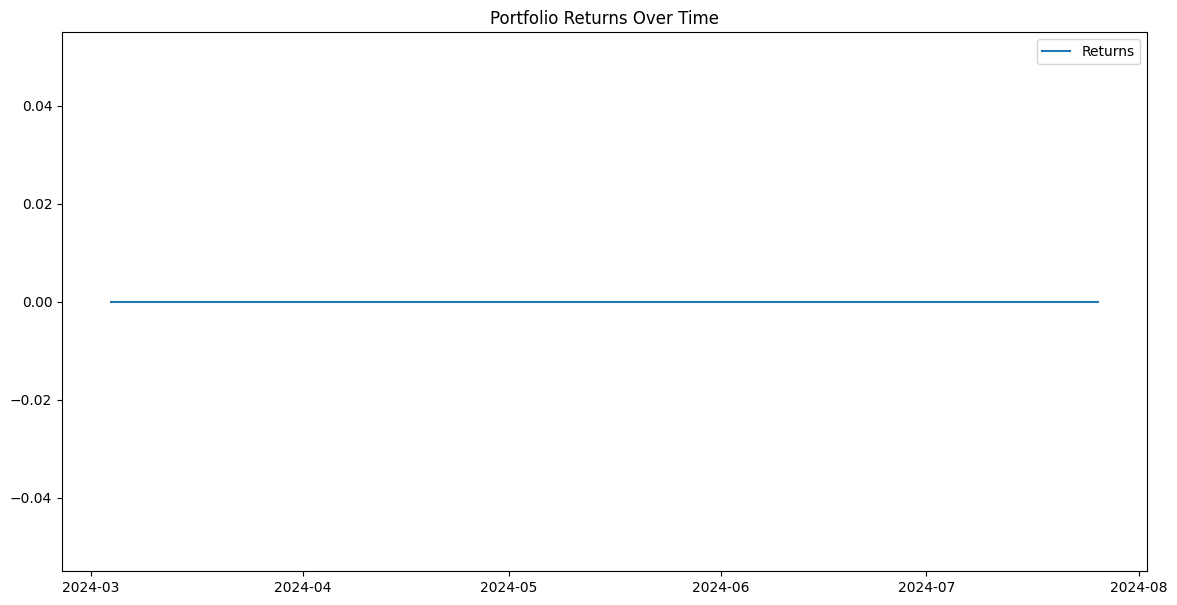

In [107]:
# Plot the stock price along with moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["Short_MA"], label=f"{short_window}-Day MA")
plt.plot(stock_data["Long_MA"], label=f"{long_window}-Day MA")
plt.title("Stock Price with Moving Averages")
plt.legend()


# Plot portfolio value and returns
plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Total"], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.legend()

plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Returns"], label="Returns")
plt.title("Portfolio Returns Over Time")
plt.legend()

display(plt)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

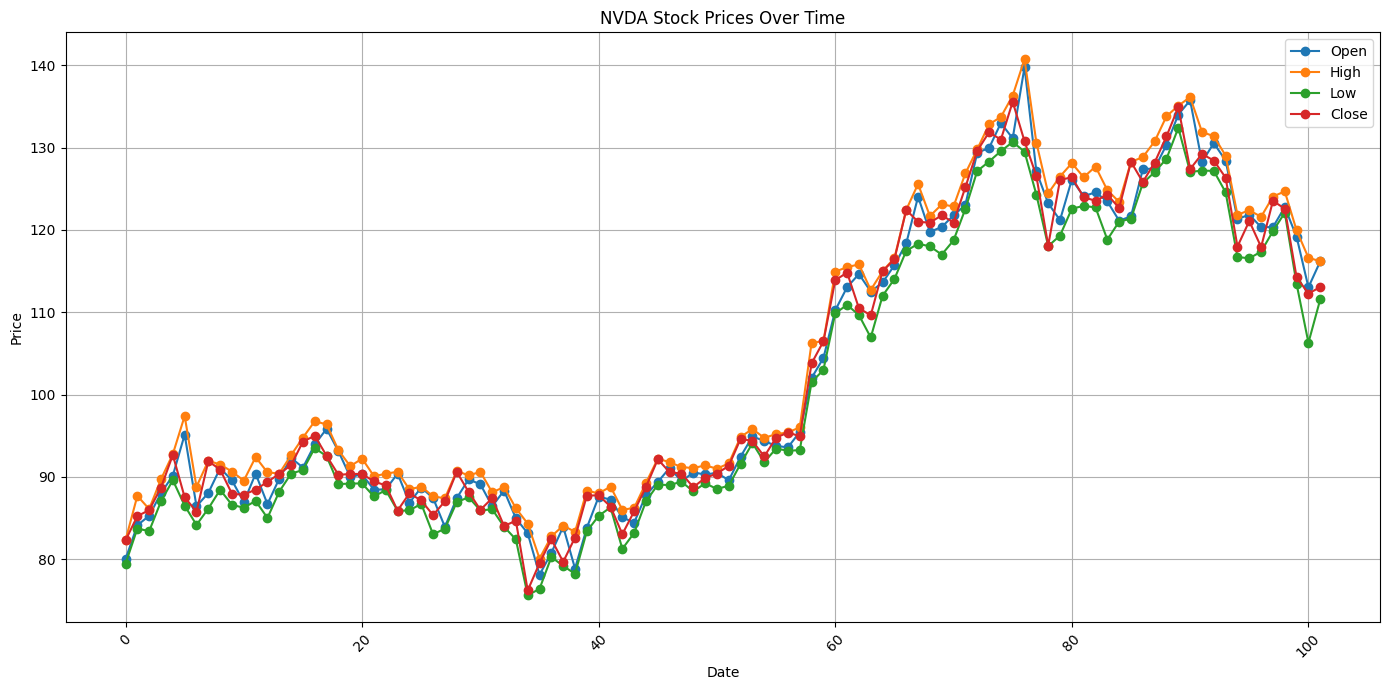

In [108]:
dd = pd.DataFrame(stock_data)

stock_data.reset_index(inplace=True)

plt.figure(figsize=(14, 7))

# Plotting the data
plt.plot(dd.index, dd["Open"], marker="o", label="Open")
plt.plot(dd.index, dd["High"], marker="o", label="High")
plt.plot(dd.index, dd["Low"], marker="o", label="Low")
plt.plot(dd.index, dd["Close"], marker="o", label="Close")

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{ticker} Stock Prices Over Time")
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)

display(plt)